In [37]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LightSource
import copy as cp

In [22]:
from google.colab import files

In [2]:
# physical parameters:

L = 1
K = 210
C = 900
rho = 2700

#numerical parametes:

# timesteps
Nt = 10000
# spacesteps
Nx = 101

# Define intervals
dt = 0.1  #first simulation
dx = L / (Nx - 1)     #0.01

In [3]:
def T_IC(x):
  return np.sin(np.pi*x/L)

 #FTCS 
def FTCS(T_old, dt):
  T = cp.deepcopy(T_old)
  
  for n in range(Nt-1):
    for j in range(1, Nx-1):    
      eta = K*dt/(C*rho*dx**2)
      T[n+1, j] = T[n, j] + eta*(T[n, j+1] + T[n, j-1] - 2*T[n, j]) 

  return T

#theoretical T
def T_theory(x, t):
  T = np.zeros((len(t), len(x)))
  XX, TT = np.meshgrid(x, t)
  T = np.sin(np.pi*XX/L)*np.exp(-(np.pi**2*K*TT)/(L**2*C*rho))
  return T

In [4]:
# Plot solution
def graphSolution(u, x, y, zaxis):
    X,Y = np.meshgrid(x, y)
    light = LightSource(180, 45)
    illuminated_surface = light.shade(u, cmap=cm.coolwarm)
    fig = plt.figure(figsize=(10, 13))
    ax0 = fig.add_subplot(211, projection='3d')
    ax0.plot_surface(X, Y, u, rstride=1, cstride=1, cmap='viridis',   edgecolor='none')#linewidth=0, antialiased=False, facecolors=illuminated_surface)
    ax0.set_xlabel('x')
    ax0.set_ylabel('t')
    ax0.set_zlabel(zaxis)
    #ax0.set_title('Solution u(x,y)')
    ax0.view_init(45, 45)
    ax1 = fig.add_subplot(212)
    graph1 = ax1.imshow(u, cmap='viridis',  aspect='equal', origin='lower',
                        interpolation='bilinear', extent=[min(x), max(x), min(y), max(y)]) #coolwarm
    ax1.set_xlabel('x')
    ax1.set_ylabel('t')
    ax1.set_title(zaxis)
    ax1.set_xlim(min(x), max(x))
    ax1.set_ylim(min(y), max(y))
    fig.colorbar(graph1, ax=ax1)
    plt.tight_layout()    
    plt.savefig("fig2.png")
    files.download("fig2.png")
    plt.show()

In [5]:
x = np.linspace(0, 1, Nx)
t = np.linspace(0, dt*Nt, Nt)

In [6]:
T = np.zeros((Nt, Nx)) 
T[0, :-1] = T_IC(np.arange(0, L, dx))

In [66]:
T_exp = FTCS(T, dt)

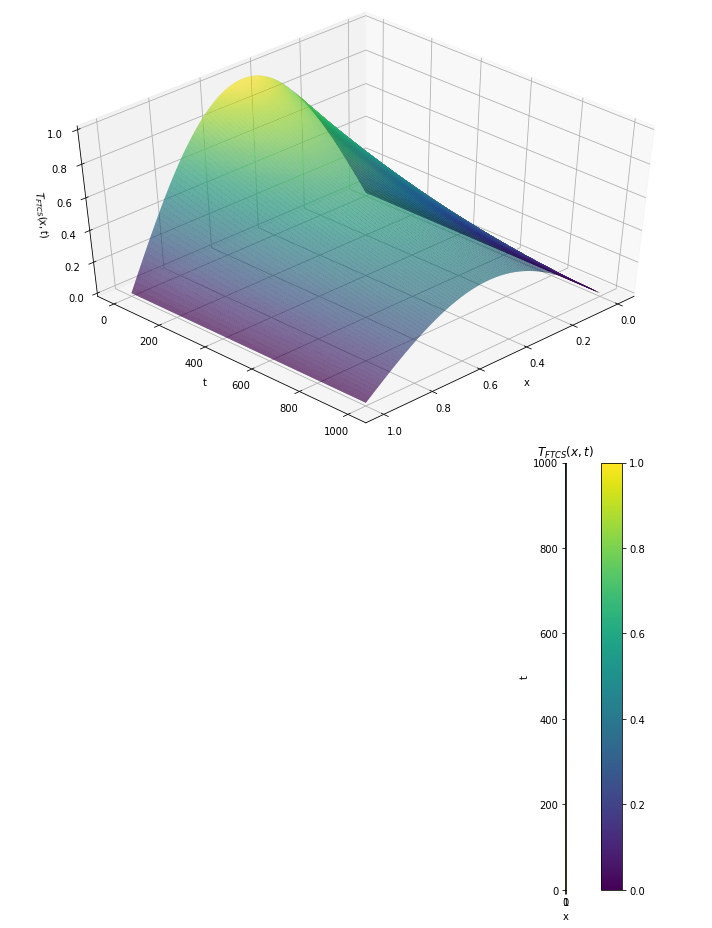

In [19]:
graphSolution(T_exp, x, t, zaxis = '$T_{FTCS}(x, t)$')

In [65]:
T_exact = T_theory(x, t)

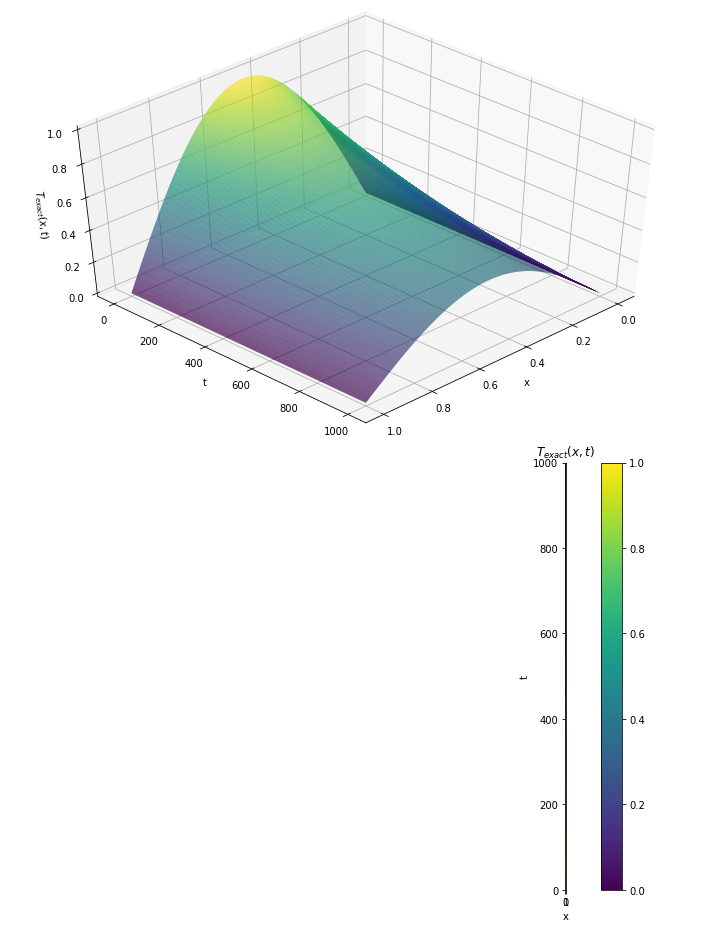

In [21]:
graphSolution(T_exact, x, t, zaxis = '$T_{exact}(x, t)$')

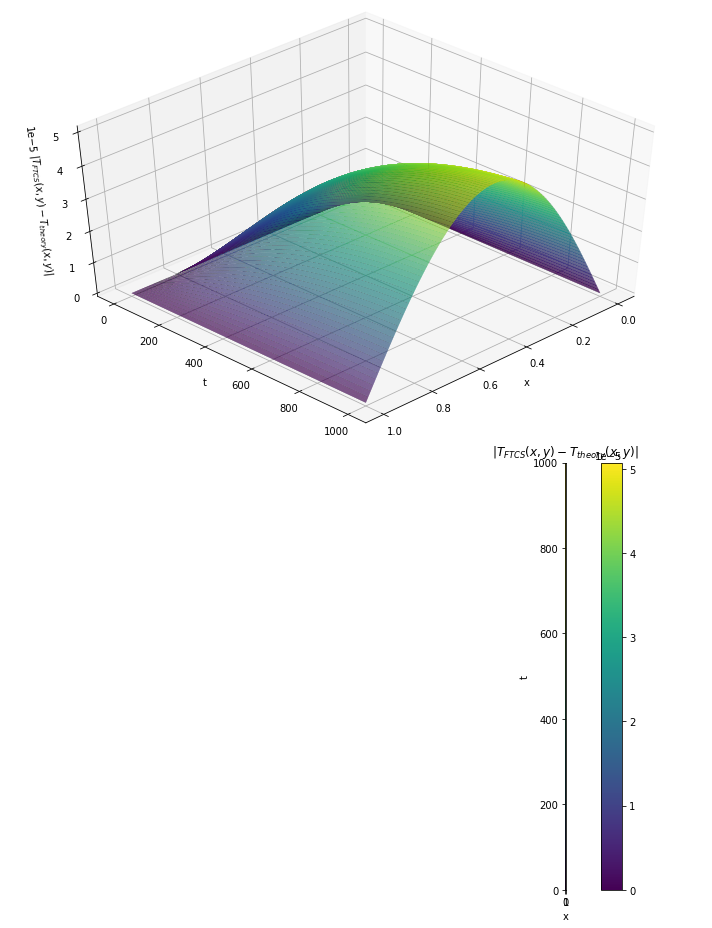

In [69]:
graphSolution(np.abs(T_exp-T_exact), x, t, zaxis = '$|T_{FTCS}(x, y) - T_{theory}(x, y)|$')

In [54]:
def error(T, T_exact):
  return 1/Nx * np.sum(np.abs(T[:, :] - T_exact[:, :]), axis = 1)

In [55]:
epsilon = error(T_exp, T_exact)

In [56]:
np.shape(epsilon)

(10000,)

[]

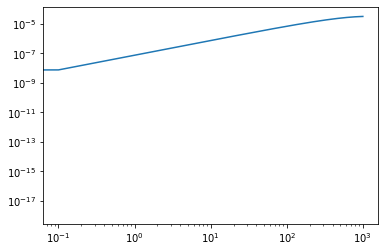

In [57]:
plt.plot(t, epsilon)
# plt.semilogy()
plt.loglog()

In [58]:
epsilon[99]

7.367614815461478e-07

In [60]:
dt_list = np.linspace(0.001, 0.55, 50)
err_dt = np.zeros((len(dt_list)))
np.shape(err_dt)

(50,)

In [61]:
dt_list

array([0.001     , 0.01220408, 0.02340816, 0.03461224, 0.04581633,
       0.05702041, 0.06822449, 0.07942857, 0.09063265, 0.10183673,
       0.11304082, 0.1242449 , 0.13544898, 0.14665306, 0.15785714,
       0.16906122, 0.18026531, 0.19146939, 0.20267347, 0.21387755,
       0.22508163, 0.23628571, 0.2474898 , 0.25869388, 0.26989796,
       0.28110204, 0.29230612, 0.3035102 , 0.31471429, 0.32591837,
       0.33712245, 0.34832653, 0.35953061, 0.37073469, 0.38193878,
       0.39314286, 0.40434694, 0.41555102, 0.4267551 , 0.43795918,
       0.44916327, 0.46036735, 0.47157143, 0.48277551, 0.49397959,
       0.50518367, 0.51638776, 0.52759184, 0.53879592, 0.55      ])

In [62]:
for i, dt_temp in enumerate(dt_list):
  T_temp = FTCS(T, dt_temp)
  t_temp = np.linspace(0, dt_temp*Nt, Nt)
  T_exact_temp =  T_theory(x, t_temp)
  err = error(T_temp, T_exact_temp)
  err_dt[i] = err[99]

In [45]:
err_dt

array([9.69054702e-07, 1.04662544e-05, 1.77531218e-05, 2.31965764e-05,
       2.71111090e-05, 2.97656460e-05, 3.13895658e-05, 3.21779678e-05,
       3.22962827e-05, 3.18843023e-05, 3.10596996e-05, 2.99211003e-05,
       2.85507596e-05, 2.70168923e-05, 2.53757001e-05, 2.36731312e-05,
       2.19464074e-05, 2.02253457e-05, 1.85335022e-05, 1.68891589e-05,
       1.53061744e-05, 1.37947156e-05, 1.23618859e-05, 1.10122626e-05,
       9.74835666e-06, 8.57100404e-06, 7.47969794e-06, 6.47287030e-06,
       5.54812898e-06, 4.70245706e-06, 3.93237925e-06, 3.23410026e-06,
       2.60361901e-06, 2.03682225e-06, 1.52956056e-06, 1.07770941e-06,
       6.77217524e-07, 3.24144556e-07, 1.46897755e-08, 2.54786814e-07,
       4.87749609e-07, 6.87477736e-07, 8.57059646e-07, 9.99391179e-07,
       1.11717643e-06, 1.21293083e-06, 1.28898598e-06, 1.34749582e-06,
       1.39044378e-06, 1.41965062e-06])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

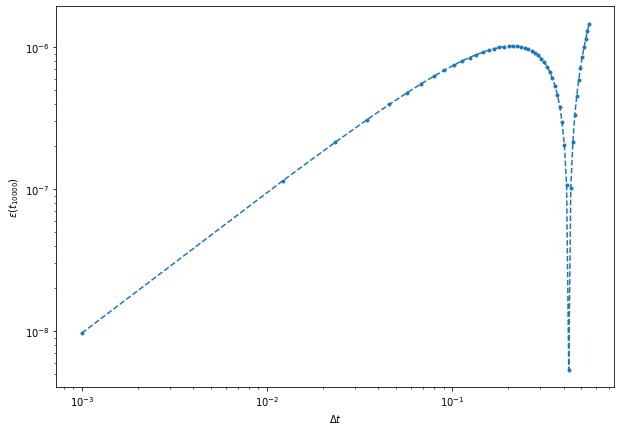

In [71]:

fig = plt.figure(figsize=(10, 7))
plt.plot(dt_list, err_dt, '.--', label = 'FTCS')
# plt.semilogy()

plt.ylabel('$\epsilon(t_{10000})$')
plt.xlabel('$\Delta t$')
plt.loglog()
plt.savefig("fig2b.png")
files.download("fig2b.png")
plt.show()